<a href="https://colab.research.google.com/github/thiagonoobre/Projeto_Analise_de_Vendas/blob/main/Explora%C3%A7%C3%A3o_An%C3%A1lise_de_Dados_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO EXPLORAÇÃO E ANÁLISE DE DADOS DE VENDAS

Nesse projeto estaremos trabalhando com conjunto de dados da ***Contoso Corporation***, que é uma empresa fictícia da **Microsoft**, no qual eles disponibilizaram um Banco de dados, que simula uma multinacional no setor de varejo ([link](https://www.microsoft.com/en-us/download/details.aspx?id=18279)). Seu banco de dados contém informações relacionadas a vendas, produtos, clientes e transações financeiras, oferecendo um cenário realista para explorar técnicas de análise de dados e gerar insights de negócios.

Neste notebook, realizaremos uma análise exploratória das vendas da Contoso, utilizando SQL para consultar e combinar tabelas, a fim de extrair informações valiosas e compreender melhor os padrões de vendas e o comportamento dos clientes.



![](https://learn.microsoft.com/pt-br/microsoft-365/media/contoso-overview/contoso-overview-fig1.png?view=o365-worldwide)

### 1\. Entendendos os Dados

Nosso foco será nas tabelas de vendas (`FactOnlineSales`), produtos (`DimProduct`) e clientes (`DimCustomer`). Através da análise desses dados e de suas relações com outras tabelas, buscaremos um entendimento mais completo do nosso banco de dados.

A análise não abrangerá todas as colunas das tabelas, no entanto, essa amostra nos permite ter uma ideia da dimensão do banco de dados e da complexidade dos dados que ele contém.

Apresentaremos as consultas (`queries`) utilizadas para extrair os nomes das colunas.

#### **1\.1 FactOnlineSales**

* Query para extrair os nomes das colunas


```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'FactOnlineSales'



Os dados replesentam as informações de vendas contendo as seguintes colunas:

* OnlineSalesKey = Id das vendas
* DateKey = Data da venda
* StoreKey = Id da Loja
* ProductKey = Id do Produto
* PromotionKey = Id da Promoção
* CurrencyKey = Id da Moeda
* CustomerKey = Id do Cliente
* SalesOrderNumber = Número do pedido de venda
* SalesOrderLineNumber = Número da linha do pedido de vendas
* SalesQuantity = Quantidade de vendas
* SalesAmount = Valor das vendas
* ReturnQuantity = Quantidade de devolução
* ReturnAmount = Valor da devolução
* DiscountQuantity = Quantidade do desconto
* DiscountAmount = Valor do desconto
* TotalCost = Custo total
* UnitCost = Custo unitário
* UnitPrice = Preço unitário

#### **1\.2 DimProduct**

* Query para extrair os nomes das colunas



```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'DimProduct'



Os dados replesentam as informações dos produtos contendo as seguintes colunas:

* ProductKey = Id do Produto
* ProductLabel = Rótulo do produto
* ProductName = Nome do produto
* ProductDescription = Descrição do produto
* ProductSubcategoryKey = Is da subcategoria do produto
* Manufacturer = Fabricante
* BrandName = Nome da marca
* ClassID = ClassID
* ClassName = Nome da classe
* StyleID = ID do estilo
* StyleName = Nome do estilo
* ColorID = ID da cor
* ColorName = Nome da cor
* Size = Tamanho
* SizeRange = Faixa de tamanho
* SizeUnitMeasureID = ID da unidade de medida de tamanho
* Weight = Peso
* WeightUnitMeasureID = ID da unidade de medida de peso
* UnitOfMeasureID = ID da unidade de medida
* UnitOfMeasureName = Nome da unidade de medida
* StockTypeID = ID do tipo de estoque
* StockTypeName = Nome do tipo de estoque
* UnitCost = Custo unitário
* UnitPrice = Preço unitário
* AvailableForSaleDate = Data de disponibilidade para venda
* StopSaleDate = Data de término da venda
* Status = Status

#### **1\.2 DimCustomer**

* Query para extrair os nomes das colunas



```sql
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'DimCustomer'



Os dados replesentam as informações dos Clientes contendo as seguintes colunas:

* CustomerKey = Id do Cliente
* GeographyKey = Id da Geografia
* CustomerLabel = Rótulo do Cliente
* Title = Título
* FirstName = Primeiro Nome
* MiddleName = Nome do Meio
* LastName = Sobrenome
* NameStyle = Estilo do Nome
* BirthDate = Data de Nascimento
* MaritalStatus = Estado Civil
* Suffix = Sufixo
* Gender = Gênero
* EmailAddress = Endereço de Email
* YearlyIncome = Renda Anual
* TotalChildren = Total de Filhos
* NumberChildrenAtHome = Número de Filhos em Casa
* Education = Educação
* Occupation = Ocupação
* HouseOwnerFlag = Indicador de Proprietário de Casa
* NumberCarsOwned = Número de Carros Possuídos
* AddressLine1 = Endereço Linha 1
* AddressLine2 = Endereço Linha 2
* Phone = Telefone
* DateFirstPurchase = Data da Primeira Compra
* CustomerType = Tipo de Cliente
* CompanyName = Nome da Empresa

### 2\. Exploração de Dados

#### **2\.1 Coleta**

Para iniciar a análise dos dados, realizei uma consulta SELECT TOP(5) em cada uma das tabelas principais: `DimProduct`, `DimCustomer` e `FactOnlineSales`. Essa consulta me permitiu obter uma amostra dos 5 primeiros registros de cada tabela, o que me deu uma visão geral rápida da estrutura e dos dados contidos em cada uma delas. Essa abordagem é útil para validar a integridade dos dados e identificar possíveis inconsistências antes de realizar análises mais aprofundadas.

- FactOnlineSales

```sql
SELECT TOP(5) * FROM FactOnlineSales
 ```

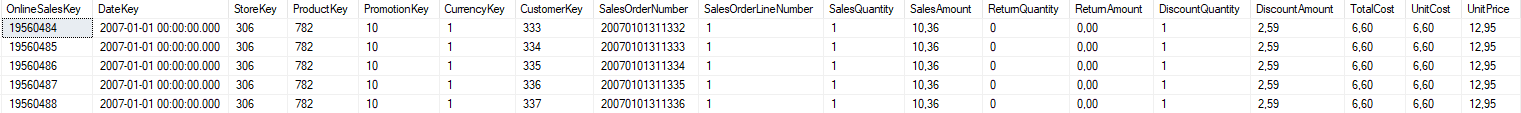

- DimCustomer

```sql
SELECT TOP(5) * FROM DimCustomer
 ```

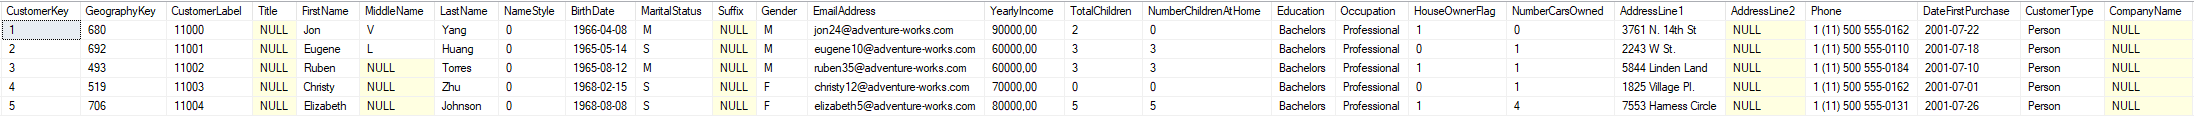

- DimProduct

```sql
SELECT TOP(5) * FROM DimProduct
```

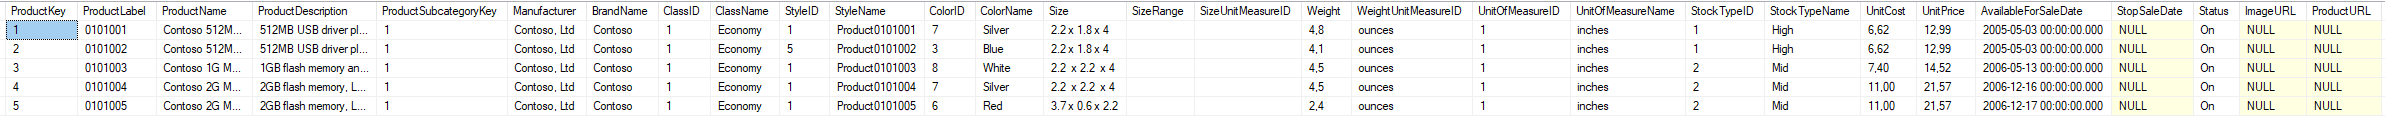

>As queries a seguir dara uma visão da quantidade de registros que temos em cada tabela.

- FactOnlineSales

```sql
SELECT COUNT(*) FROM FactOnlineSales
 ```

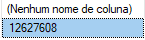

- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer
 ```

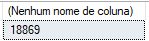

- DimProduct

```sql
SELECT COUNT(*) FROM DimProduct
```

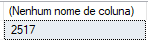

>Como podemos ver temos grande quantidade de registro de vendas. O próximo passo é investigar a qualidade dos dados nas suas tabelas `DimProduct`, `DimCustomer` e `FactOnlineSales`. Para isso, utilizaremos consultas SQL específicas para identificar dados nulos e verificar os tipos de dados em cada coluna. Considerando que você já possui familiaridade com essas tabelas, apresentarei a seguir as consultas e seus objetivos.


#### **2\.2 Estrutura**

```sql
SELECT
    COLUMN_NAME AS ColumnName,
    DATA_TYPE AS DataType,
    IS_NULLABLE AS IsNullable
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'TableName';


- FactOnlineSales

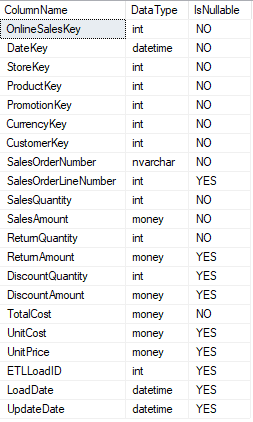

- DimCustomer

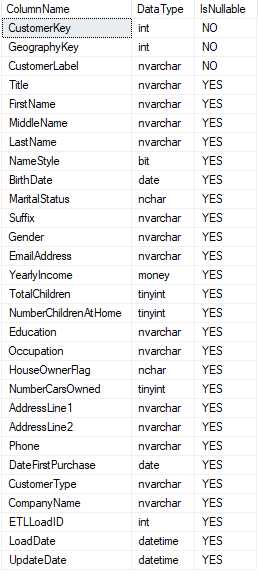

- DimProduct

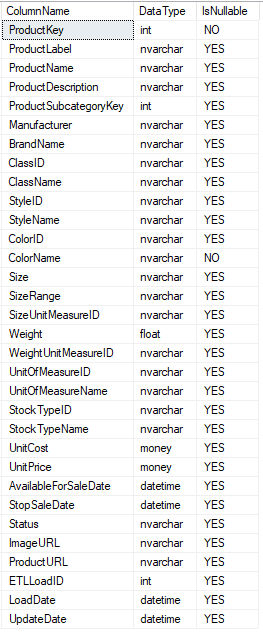


**Explicação dos Campos**

1. **`COLUMN_NAME`**: Nome da coluna na tabela.
2. **`DATA_TYPE`**: Tipo de dado da coluna (ex.: `int`, `varchar`, etc.).
3. **`IS_NULLABLE`**: Indica se a coluna permite valores nulos (`YES` ou `NO`).
4. **`NullCount`**: Conta a quantidade de valores nulos em cada coluna da tabela especificada.




Mesmo que uma coluna esteja configurada como **`IS_NULLABLE = YES`**, permitindo valores nulos, isso não significa que ela necessariamente tenha valores nulos armazenados. A configuração indica apenas que o banco de dados aceita entradas nulas para aquela coluna, mas o conteúdo real da tabela depende dos dados inseridos. Por isso, é importante verificar diretamente o número de valores nulos para ter uma visão clara da integridade dos dados.

#### **2\.3 Dados Faltantes**

Para garantir a qualidade dos dados em nossas análises, vamos iniciar a verificação de valores nulos nas colunas do tipo `varchar` (texto). Concentraremos nossos esforços nas colunas que serão utilizadas como critério de filtragem, agrupamento ou cálculo nas próximas etapas, a fim de evitar resultados imprecisos.

- FactOnlineSales

>A tabela `FactOnlineSales`  possui restrições de integridade em algumas colunas, garantindo a presença de dados nesses campos.


- DimCustomer

```sql
SELECT COUNT(*) FROM DimCustomer WHERE FirstName IS NULL


>Resultado: 385
>
>A coluna de `FirstName` pode-se encontrar o primeiro nome do cliente, mas encontramos 385 valores nulos. Não só nela, mas se fizer uma consulta mais aprofunda, pode ser enccontrado os mesmo resultados para as colunas de `LastName`, `BirthDate`, `Gender` e `EmailAddress`, no qual são informações essenciais para as nossas consultas.




```sql
SELECT * FROM DimCustomer WHERE FirstName IS NULL


>Ao analisar os valores nulos nas colunas `LastName`, `BirthDate`, `Gender` e `EmailAddress`, observamos que a maioria está concentrada em registros onde o `CustomerType` é 'Company'. Essa situação é esperada, pois a Contoso atende tanto empresas quanto pessoas físicas. Essa informação é fundamental para nossas próximas análises.

```sql
SELECT * FROM DimCustomer WHERE CustomerType = 'Person'



>Ao filtrar os dados para clientes do tipo 'Person', constatamos que a coluna `CompanyName` não possui valor para esses registros.

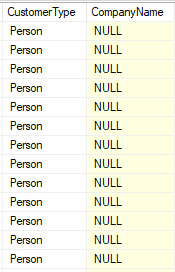

>A Contoso possui uma base de clientes diversificada, incluindo tanto pessoas físicas quanto empresas. Isso nos permite realizar análises abrangentes sobre os diferentes perfis de consumidores.

---

- DimProduct

```sql
SELECT COUNT(DISTINCT ProductName) FROM DimProduct


>Resultado: 2517
>
>A quantidade de produtos registrados corresponde ao número de nomes de produtos únicos encontrados na base de dados. É fundamental que não haja valores nulos no campo 'Nome do Produto', pois essa informação é essencial para identificar cada item de forma individual.

---





```sql
SELECT DISTINCT BrandName FROM DimProduct


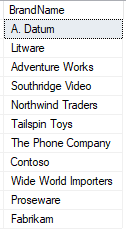





>Neste ponto, já é possível identificar as marcas presentes no catálogo de produtos comercializados pela Contoso, sem a presença de valores nulos.

---

### 3\. Análise de dados


Após a exploração inicial dos dados, passamos à etapa de análise para extrair insights acionáveis que auxiliem na tomada de decisão. Nesta etapa, focaremos em três pilares:
- Comportamento dos clientes
- Performance dos produtos
- Tendências e padrões de vendas

Essas análises serão realizadas com base nas tabelas de Clientes, Vendas Online e Produtos.



#### **3\.1 Análise do Comportamento dos Clientes**

**Pergunta:** Quais são os clientes mais valiosos e qual o ticket médio por compra?

***Passo 1: Extração dos Dados***

Utilizamos as tabelas de `DimCustomer` e `FactOnlineSales` para calcular:
- Total gasto por cliente
- Frequência de compras
- Ticket médio

***Passo 2: Visualização***

[Insira o gráfico aqui, como um bar chart mostrando os clientes mais valiosos.]

***Passo 3: Interpretação***

Os dados mostram que os clientes do grupo X possuem maior frequência de compras, com um ticket médio de Y. Esse grupo pode ser prioritário em campanhas de marketing.


- De primeiro momento vamos entender as vendas registradas de quais anos

```sql
SELECT
	DISTINCT
	YEAR(DateKey) AS 'YEAR'
FROM
	FactOnlineSales


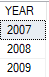

> Ao analisarmos os resultados desta consulta, conseguimos determinar os anos exatos que estão incluídos em nossa base de dados de vendas. Essa informação é essencial para calcular a frequência de compra dos clientes, ou seja, quantas vezes cada cliente realizou uma compra em um determinado período.

---

Para realizar o cálculo, utilizamos as tabelas `DimCustomer` e `FactOnlineSales`. No entanto, é necessário filtrar os dados por tipo de cliente (pessoa física ou jurídica). Essa filtragem é crucial, pois empresas tendem a realizar compras de maior valor, o que pode distorcer nossa análise, gerando **outliers** indesejados:

- Total gasto por cliente
- Frequência de compras
- Ticket médio

```sql

SELECT
	f.CustomerKey,
	SUM(SalesAmount) AS 'RECEITA_TOTAL',
	COUNT(OnlineSalesKey) AS 'FREQUÊNCIA_COMPRA',
	SUM(SalesAmount) / COUNT(OnlineSalesKey) AS 'TICKET_MEDIO'
FROM
	FactOnlineSales AS f
INNER JOIN DimCustomer AS c
	ON f.CustomerKey = c.CustomerKey
WHERE CustomerType = 'Person'
GROUP BY f.CustomerKey
ORDER BY RECEITA_TOTAL
